# Python处理地理信息
## Contour:等值线

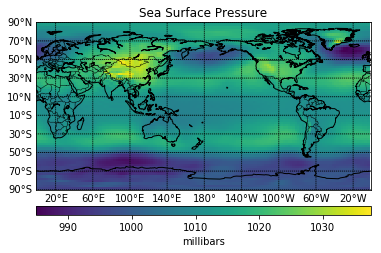

In [17]:
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

meteo_file = '/home/data/nc/1948/slp.mon.mean.nc'
fh = Dataset('slp.mon.mean.nc')#(meteo_file, mode='r')

# 获取每个变量的值
lons = fh.variables['lon'][:]
lats = fh.variables['lat'][:]
slp = fh.variables['slp'][:]
slp_units = fh.variables['slp'].units


# 经纬度平均值
lon_0 = lons.mean()
lat_0 = lats.mean()
# 控制地图的范围
m = Basemap(llcrnrlat=15,urcrnrlat=55,llcrnrlon=70,urcrnrlon=140)
m = Basemap(lat_0=lat_0, lon_0=lon_0)
# 根据数据的经纬度生成对应的地理网格点
lon, lat = np.meshgrid(lons, lats)
xi, yi = m(lon, lat)

# Plot Data
# 绘制具体的时间层，这里是具体的第一层时间
slp_0 = slp[0:1:, ::, ::]
# 核心的画图api
cs = m.pcolor(xi, yi, np.squeeze(slp_0))

# Add Grid Lines
# 绘制经纬线

m.drawparallels(np.arange(-90., 91., 20.), labels=[1,0,0,0], fontsize=10)
m.drawmeridians(np.arange(-180., 181., 40.), labels=[0,0,0,1], fontsize=10)

# Add Coastlines, States, and Country Boundaries绘制陆地、国家和州界线
m.drawcoastlines()
#m.drawstates()
m.drawcountries()

# Add Colorbar
cbar = m.colorbar(cs, location='bottom', pad="10%")
cbar.set_label(slp_units)

# Add Title
plt.title('Sea Surface Pressure')
plt.show()

fh.close()

# vector：矢量图

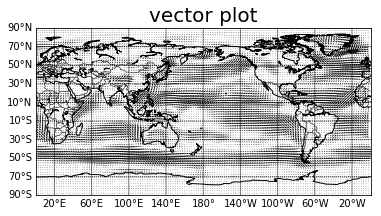

In [21]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np

obju=nc.Dataset('uwnd.mon.mean.nc')
objv=nc.Dataset('vwnd.mon.mean.nc')



u=obju.variables['uwnd'][0,0,:,:]
v=objv.variables['vwnd'][0,0,:,:]
lats=obju.variables['lat'][:]
lons=obju.variables['lon'][:]


m=Basemap(llcrnrlat=-90,urcrnrlat=90,llcrnrlon=0,urcrnrlon=360)
# 根据数据的经纬度生成对应的地理网格点
lon, lat = np.meshgrid(lons, lats)
xi, yi = m(lon, lat)


x,y=m(lons,lats)

m.drawparallels(np.arange(-90., 91., 20.), labels=[1,0,0,0], fontsize=10)
m.drawmeridians(np.arange(-180., 181., 40.), labels=[0,0,0,1], fontsize=10)
# Add Coastlines, States, and Country Boundaries绘制陆地、国家和州界线
m.drawcoastlines()
#m.drawstates()
m.drawcountries()
#m.drawlsmask()
# curve=m.contour(lons,lats,u,colors='k')
# shade=m.contourf(lons,lats,u)
# m.colorbar(shade)
# plt.clabel(curve,fmt='%1.0f')
# print help(plt.quiver)
wind=m.quiver(lons,lats,u,v,width=0.002,headwidth=2,headlength=4)
plt.title('vector plot',size=20)
plt.show()

# Shade：阴影图

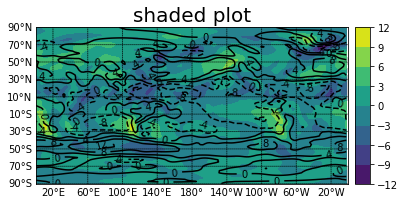

In [24]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np
obju=nc.Dataset('uwnd.mon.mean.nc')
objv=nc.Dataset('vwnd.mon.mean.nc')



u=obju.variables['uwnd'][0,0,:,:]
v=objv.variables['vwnd'][0,0,:,:]
lats=obju.variables['lat'][:]
lons=obju.variables['lon'][:]


m=Basemap(llcrnrlat=-90,urcrnrlat=90,llcrnrlon=0,urcrnrlon=360)
# 根据数据的经纬度生成对应的地理网格点
lon, lat = np.meshgrid(lons, lats)
xi, yi = m(lon, lat)


x,y=m(lons,lats)

m.drawparallels(np.arange(-90., 91., 20.), labels=[1,0,0,0], fontsize=10)
m.drawmeridians(np.arange(-180., 181., 40.), labels=[0,0,0,1], fontsize=10)

m.drawlsmask()
curve=m.contour(lon,lat,u,colors='k')
shade=m.contourf(lon,lat,v)
m.colorbar(shade)
plt.clabel(curve,fmt='%1.0f')
# print help(plt.quiver)
# wind=m.quiver(lons,lats,u,v,width=0.002,headwidth=2,headlength=4)
plt.title('shaded plot',size=20)
plt.show()